# Flight Track Plot

This example notebook demonstrates:
- using cartopy to plot data on a map
- using the cfeatures module of cartopy to add land/ocean features
- adding a colorbar

In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
# Read dataset
naames = pd.read_csv('../lessons/tabular_data/data/naames-mrg01-c130_merge_20151112_R5_thru20151114.csv', skiprows=223)
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})
# Create geodataframe
naames_gpd = gpd.GeoDataFrame(naames, 
                            geometry=gpd.points_from_xy(naames[' LONGITUDE'], naames[' LATITUDE']), 
                            crs='epsg:4326')

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter

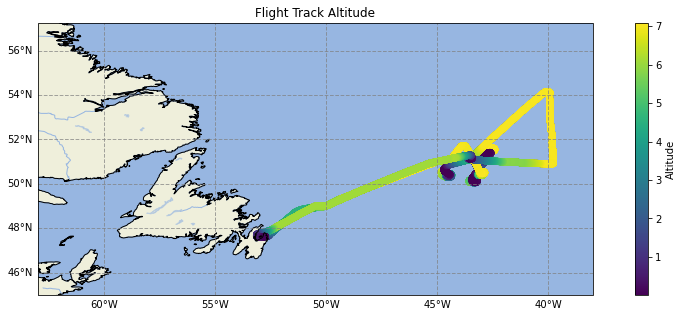

In [22]:
# Define the plot CRS
crs = ccrs.PlateCarree()

# Convert the dataframe to that crs
naames_gpd_pc = naames_gpd.to_crs(crs.proj4_init)

# Create the figure
fig = plt.figure()
ax = plt.axes(projection=crs)

fig.set_size_inches(15, 5)  # Increase the size of the plot


# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_title('Flight Track Altitude')  # Add a title

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.7, linestyle='--')
gl.top_labels, gl.right_labels = False, False


ax.set_extent([-63, -38, 45, 57])  # Broaden extent of plot
scatter = naames_gpd_pc.plot(ax=ax, column=' ALTP', legend=True, legend_kwds={'label': "Altitude"})
